In [1]:
# import library
# load_data
# split train data & test data
# data normalization
# define class
# define criterion & loss
# define train loop & validation loop

In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 20
NUM_WORKERS = 0

In [4]:
transform = transforms.ToTensor()
# Download and load the training & test data
trainset = datasets.MNIST('../data/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('../data/MNIST_data/', download=True, train=False, transform=transform)

In [5]:
# Define loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
# testset에도 batch를 사용해야 하는가? => ok
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [6]:
# get data using iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [7]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [8]:
# # Define Network
# class MLPClassifier(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(784,512)
#         self.fc2 = nn.Linear(512,512)
#         self.fc3 = nn.Linear(512,10)

#         self.dropout = nn.Dropout(0.2)
    
#     def forward(self, x):
#         x = x.view(x.shape[0], -1)

#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = F.softmax(self.fc3(x), dim=1)

#         return x

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [11]:
# model = MLPClassifier()

# criterion = nn.NLLLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.003)

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 20
steps = 0

model.train()

for epoch in range(epochs):
    train_loss = 0

    for image, label in trainloader:
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()

        log_prob = model(image)
        log_loss = criterion(log_prob, label)
        log_loss.backward()
        optimizer.step()

        train_loss += log_loss.item()
    train_loss = train_loss/len(trainloader)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.837049
Epoch: 2 	Training Loss: 0.325774
Epoch: 3 	Training Loss: 0.253851
Epoch: 4 	Training Loss: 0.206883
Epoch: 5 	Training Loss: 0.173682
Epoch: 6 	Training Loss: 0.149371
Epoch: 7 	Training Loss: 0.130141
Epoch: 8 	Training Loss: 0.117021
Epoch: 9 	Training Loss: 0.104655
Epoch: 10 	Training Loss: 0.094961
Epoch: 11 	Training Loss: 0.087795
Epoch: 12 	Training Loss: 0.079865
Epoch: 13 	Training Loss: 0.074883
Epoch: 14 	Training Loss: 0.068899
Epoch: 15 	Training Loss: 0.064261
Epoch: 16 	Training Loss: 0.060012
Epoch: 17 	Training Loss: 0.055618
Epoch: 18 	Training Loss: 0.051824
Epoch: 19 	Training Loss: 0.048805
Epoch: 20 	Training Loss: 0.045562


In [14]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(BATCH_SIZE):
        label = target[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.003206

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 98% (1016/1032)
Test Accuracy of     3: 98% (996/1010)
Test Accuracy of     4: 97% (959/982)
Test Accuracy of     5: 95% (855/892)
Test Accuracy of     6: 98% (940/958)
Test Accuracy of     7: 97% (1002/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (982/1009)

Test Accuracy (Overall): 97% (9796/10000)


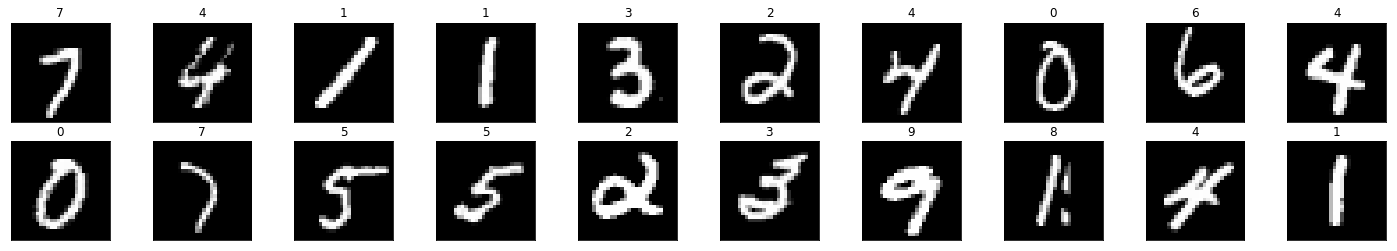

In [25]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = images.to(labels)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = torch.Tensor.cpu(images)
images = images.numpy()
labels = torch.Tensor.cpu(labels)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{}".format(str(preds[idx].item())))